# Bounding box detection - Racoon data


## Data files
- images_racoon.rar: contain images of racoons
- train_labels.cv: contains coordinates for bounding box for every image

### Import the necessary libraries

In [1]:
# Impoting the Tensorflow detection API

!git clone https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 33643, done.
remote: Total 33643 (delta 0), reused 0 (delta 0), pack-reused 33643
Receiving objects: 100% (33643/33643), 511.93 MiB | 37.35 MiB/s, done.
Resolving deltas: 100% (21537/21537), done.
Checking out files: 100% (3194/3194), done.


In [2]:
#Verify that models folder exist
!ls -l

total 8
drwxr-xr-x 7 root root 4096 Jan 12 04:05 models
drwxr-xr-x 1 root root 4096 Dec 18 16:52 sample_data


In [3]:
#Multiple folders including object_detection should exist in models/research folder
!ls -l models/research/

total 280
drwxr-xr-x  2 root root 4096 Jan 12 04:05 a3c_blogpost
drwxr-xr-x  2 root root 4096 Jan 12 04:05 adversarial_crypto
drwxr-xr-x  4 root root 4096 Jan 12 04:05 adversarial_logit_pairing
drwxr-xr-x  3 root root 4096 Jan 12 04:05 adversarial_text
drwxr-xr-x  2 root root 4096 Jan 12 04:05 adv_imagenet_models
drwxr-xr-x  2 root root 4096 Jan 12 04:05 astronet
drwxr-xr-x  3 root root 4096 Jan 12 04:05 attention_ocr
drwxr-xr-x  4 root root 4096 Jan 12 04:05 audioset
drwxr-xr-x  2 root root 4096 Jan 12 04:05 autoaugment
drwxr-xr-x  3 root root 4096 Jan 12 04:05 autoencoder
drwxr-xr-x  4 root root 4096 Jan 12 04:05 brain_coder
drwxr-xr-x 11 root root 4096 Jan 12 04:05 cognitive_mapping_and_planning
drwxr-xr-x  4 root root 4096 Jan 12 04:05 cognitive_planning
drwxr-xr-x  4 root root 4096 Jan 12 04:05 compression
drwxr-xr-x  7 root root 4096 Jan 12 04:05 cvt_text
drwxr-xr-x  3 root root 4096 Jan 12 04:05 deep_contextual_bandits
drwxr-xr-x  9 root root 4096 Jan 12 04:05 deeplab
drwxr-xr-x

In [4]:
# Install other dependencies

!apt-get -qq install protobuf-compiler python-pil python-lxml python-tk
!pip install --user Cython  --quiet
!pip install --user contextlib2 --quiet
!pip install --user jupyter --quiet
!pip install --user matplotlib --quiet

Selecting previously unselected package python-bs4.
(Reading database ... 135004 files and directories currently installed.)
Preparing to unpack .../0-python-bs4_4.6.0-1_all.deb ...
Unpacking python-bs4 (4.6.0-1) ...
Selecting previously unselected package python-pkg-resources.
Preparing to unpack .../1-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-chardet.
Preparing to unpack .../2-python-chardet_3.0.4-1_all.deb ...
Unpacking python-chardet (3.0.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-webencodings.
Preparing to unpack .../4-python-webencodings_0.5-2_all.deb ...
Unpacking python-webencodings (0.5-2) ...
Selecting previously unselected package python-html5lib.
Preparing to unpack .../5-python-html5lib_0.999999999-1_all.deb ...
Unpacking pyt

In [5]:
#Move to models/research folder
%cd models/research

#Convert protobuf files to Python code using Protobuf compiler installed in previous step
!protoc object_detection/protos/*.proto --python_out=.

/content/models/research


In [6]:
!ls -l object_detection/protos

total 724
-rw-r--r-- 1 root root   6848 Jan 12 04:07 anchor_generator_pb2.py
-rw-r--r-- 1 root root    747 Jan 12 04:05 anchor_generator.proto
-rw-r--r-- 1 root root   4359 Jan 12 04:07 argmax_matcher_pb2.py
-rw-r--r-- 1 root root   1151 Jan 12 04:05 argmax_matcher.proto
-rw-r--r-- 1 root root   2175 Jan 12 04:07 bipartite_matcher_pb2.py
-rw-r--r-- 1 root root    350 Jan 12 04:05 bipartite_matcher.proto
-rw-r--r-- 1 root root   6208 Jan 12 04:07 box_coder_pb2.py
-rw-r--r-- 1 root root    656 Jan 12 04:05 box_coder.proto
-rw-r--r-- 1 root root  35788 Jan 12 04:07 box_predictor_pb2.py
-rw-r--r-- 1 root root   7366 Jan 12 04:05 box_predictor.proto
-rw-r--r-- 1 root root  24908 Jan 12 04:07 calibration_pb2.py
-rw-r--r-- 1 root root   2876 Jan 12 04:05 calibration.proto
-rw-r--r-- 1 root root  13553 Jan 12 04:07 eval_pb2.py
-rw-r--r-- 1 root root   3923 Jan 12 04:05 eval.proto
-rw-r--r-- 1 root root   3445 Jan 12 04:07 faster_rcnn_box_coder_pb2.py
-rw-r--r-- 1 root root    531 Jan 12 04:05 

In [7]:
# Set up environment variable

#Change path to models/research and models/research/slim folders based on where you have cloned github repository above
%set_env PYTHONPATH=$PYTHONPATH:/content/models/research:/content/models/research/slim

env: PYTHONPATH=$PYTHONPATH:/content/models/research:/content/models/research/slim


In [8]:
# Execute Model builderr python file

!python object_detection/builders/model_builder_test.py


# Configurations are set up with this for the Tensorflow API.

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Running tests under Python 3.6.9: /usr/bin/python3
[ RUN      ] ModelBuilderTest.test_create_experimental_model
[       OK ] ModelBuilderTest.test_create_experimental_model
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[       OK ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[       OK ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_

### Change directory

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [10]:
# Create a directoy for the project

#Come to the home directory
%cd /content

#Create a folder for your project e.g in this case, racoon. 
!mkdir racoon

#Go to the project folder
%cd racoon

/content
/content/racoon


### Load the training data from train.csv file

In [13]:
# Load the data from the train file

import pandas as pd
train= pd.read_csv('/content/drive/My Drive/Great Learning AIML/train_labels.csv')
train



,filename,width,height,class,xmin,ymin,xmax,ymax
0,raccoon-17.jpg,259,194,raccoon,95,60,167,118
1,raccoon-11.jpg,660,432,raccoon,3,1,461,431
2,raccoon-63.jpg,600,400,raccoon,74,107,280,290
3,raccoon-63.jpg,600,400,raccoon,227,93,403,298
4,raccoon-60.jpg,273,185,raccoon,58,33,197,127
...,...,...,...,...,...,...,...,...
168,raccoon-137.jpg,320,240,raccoon,71,8,304,233
169,raccoon-171.jpg,224,225,raccoon,108,21,180,115
170,raccoon-190.jpg,259,194,raccoon,78,54,153,135
171,raccoon-22.jpg,640,360,raccoon,252,76,466,335


### Print the shape of the train dataset

In [14]:
# Shape and Information of the train set

train.shape

(173, 8)

In [15]:
# Train set information

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 8 columns):
filename    173 non-null object
width       173 non-null int64
height      173 non-null int64
class       173 non-null object
xmin        173 non-null int64
ymin        173 non-null int64
xmax        173 non-null int64
ymax        173 non-null int64
dtypes: int64(6), object(2)
memory usage: 10.9+ KB


### Declare a variable IMAGE_SIZE = 128 as we will be using MobileNet which will be taking Input shape as 128 * 128 

In [0]:
#Declare a variable for resizing inputs during transfer learning

IMAGE_SIZE=128

### With the help of csv.reader write a for loop which can load the train.csv file and store the path, width, height, x0,y0,x1,y1 in induvidual variables. <br>
1. Create a list variable known as 'path' which has all the path for all the training images
2. Create an array 'coords' which has the resized coordinates of the bounding box for the training images

<u>Note:</u> All the training images should be downsampled to 128 * 128 as it is the input shape of MobileNet (which we will be using for Object detection). Hence the corresponding coordinates of the bounding boxes should be changed to match the image dimension of 128 * 128 

In [0]:
import csv
import numpy as np
with open('/content/drive/My Drive/Great Learning AIML/train_labels.csv','r') as csvfile:
    paths = []
    coords = np.zeros((sum(1 for line in csvfile) - 1, 4))
    spamreader = csv.reader(csvfile, delimiter=',')
    csvfile.seek(0)
    next(spamreader, None)
    for i,row in enumerate(spamreader):
        #print(row)
        for j, r in enumerate(row): # Parse row with seven entities
            #print(i)
            if((j!= 0) & (j!=3)):
                row[j] = int(r)
            
        #print(row)      
        path, width, height, class_, xmin, ymin, xmax, ymax = row
        paths.append(path)
        #print(i)
        coords[i,0] = xmin * IMAGE_SIZE / width
        coords[i,1] = ymin * IMAGE_SIZE / height
        coords[i,2] = xmax * IMAGE_SIZE / width # Normalize bounding box by image size
        coords[i,3] = ymax * IMAGE_SIZE / height

In [33]:
paths

['raccoon-17.jpg',
 'raccoon-11.jpg',
 'raccoon-63.jpg',
 'raccoon-63.jpg',
 'raccoon-60.jpg',
 'raccoon-69.jpg',
 'raccoon-180.jpg',
 'raccoon-200.jpg',
 'raccoon-141.jpg',
 'raccoon-19.jpg',
 'raccoon-84.jpg',
 'raccoon-124.jpg',
 'raccoon-182.jpg',
 'raccoon-111.jpg',
 'raccoon-91.jpg',
 'raccoon-79.jpg',
 'raccoon-93.jpg',
 'raccoon-20.jpg',
 'raccoon-42.jpg',
 'raccoon-139.jpg',
 'raccoon-58.jpg',
 'raccoon-71.jpg',
 'raccoon-183.jpg',
 'raccoon-1.jpg',
 'raccoon-169.jpg',
 'raccoon-82.jpg',
 'raccoon-4.jpg',
 'raccoon-101.jpg',
 'raccoon-10.jpg',
 'raccoon-166.jpg',
 'raccoon-184.jpg',
 'raccoon-38.jpg',
 'raccoon-120.jpg',
 'raccoon-142.jpg',
 'raccoon-149.jpg',
 'raccoon-51.jpg',
 'raccoon-43.jpg',
 'raccoon-123.jpg',
 'raccoon-66.jpg',
 'raccoon-9.jpg',
 'raccoon-178.jpg',
 'raccoon-47.jpg',
 'raccoon-167.jpg',
 'raccoon-54.jpg',
 'raccoon-77.jpg',
 'raccoon-155.jpg',
 'raccoon-89.jpg',
 'raccoon-153.jpg',
 'raccoon-179.jpg',
 'raccoon-115.jpg',
 'raccoon-64.jpg',
 'raccoon-56

### Write a for loop which can load all the training images into a variable 'batch_images' using the paths from the 'paths' variable
<u>Note:</u> Convert the image to RGB scale as the MobileNet accepts 3 channels as inputs   

In [22]:
#Read the images

!pip install patool
import patoolib
patoolib.extract_archive("/content/drive/My Drive/Great Learning AIML/images_racoon-1.rar", outdir="/content/racoon/racoon_src")

     |████████████████████████████████| 81kB 2.6MB/s 
patool: Extracting /content/drive/My Drive/Great Learning AIML/images_racoon-1.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/My Drive/Great Learning AIML/images_racoon-1.rar"
patool:     with cwd='/content/racoon/racoon_src'
patool: ... /content/drive/My Drive/Great Learning AIML/images_racoon-1.rar extracted to `/content/racoon/racoon_src'.


'/content/racoon/racoon_src'

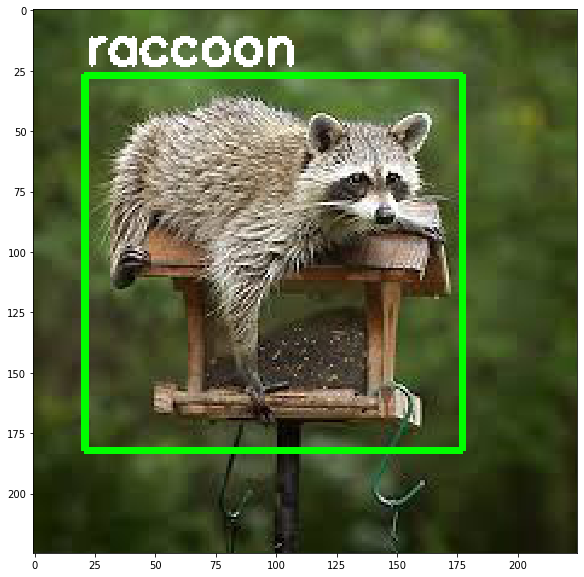

In [31]:
# Visualize the data

import cv2
import matplotlib.pyplot as plt
#Pickup a random image number
img_num = np.random.randint(0, train.shape[0])

#Read the image
img_file = train.loc[img_num,'filename']
img = cv2.imread('/content/racoon/racoon_src/images/images/' + img_file)

#Find all rows which have same file name
rows_with_file = train[train['filename'] == img_file].index.tolist()

#Draw rectangle(s) as per bounding box information
for i in rows_with_file:

    #Get bounding box
    xmin, ymin, xmax, ymax = train.loc[i, ['xmin', 'ymin', 'xmax', 'ymax']]
    #Get Label
    label = train.loc[i, 'class']
    #Add bounding box
    cv2.rectangle(img, (xmin,ymin), (xmax, ymax), (0,255,0), 2)
    #Add text
    cv2.putText(img,label,(xmin, ymin-5),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

#Convert BGR format (used by opencv to RGB format used by matplotlib)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Draw image using matplotlib
plt.figure(figsize=(15,10))
plt.imshow(img)
plt.show()

In [0]:
# For loop to load the images into a variable 'batch_images'
import tensorflow as tf
import PIL
import cv2
from PIL import Image

batch_images=np.zeros(shape=(len(paths), IMAGE_SIZE, IMAGE_SIZE, 3), dtype=np.float32)

for i, image in enumerate(paths):
  img=Image.open('/content/racoon/racoon_src/images/images/' + image)
  size = (IMAGE_SIZE, IMAGE_SIZE)
  img= img.resize(size)
  img=img.convert('RGB')
  #img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  batch_images[i]= tf.keras.applications.mobilenet.preprocess_input(np.array(img,dtype=np.float32))

### Import MobileNet and load MobileNet into a variable named 'model' which takes input shape of 128 * 128 * 3. Freeze all the layers. Add convolution and reshape layers at the end to ensure the output is 4 coordinates

In [44]:
# Import and load MobileNet

model = tf.keras.applications.mobilenet.MobileNet(include_top=False, 
                                          input_shape=(IMAGE_SIZE,IMAGE_SIZE, 3),
                                          weights='imagenet')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
17227776/17225924 [==============================] - 0s 0us/step


In [45]:
model.summary()

Model: "mobilenet_1.00_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32) 

In [0]:
# Freeze the layers

for layer in model.layers:
    layer.trainable = False

In [0]:
# Adding convolution and reshape layer
from keras.layers import Dense, Conv2D, Flatten,Reshape
from keras.models import Model

x=model.output
#x = tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Conv2D(4, kernel_size=4,name='Convolutionlayer')(x)
x=tf.keras.layers.Reshape((4,), name='Reshapelayer')(x)
# define new model
model = tf.keras.models.Model(inputs=model.input, outputs=x)

### Define a custom loss function IoU which calculates Intersection Over Union

In [0]:
def loss(gt,pred):
    intersections = 0
    unions = 0
    diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
    diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
    intersection = diff_width * diff_height
    
    # Compute union
    area_gt = gt[:,2] * gt[:,3]
    area_pred = pred[:,2] * pred[:,3]
    union = area_gt + area_pred - intersection

#     Compute intersection and union over multiple boxes
    for j, _ in enumerate(union):
        if union[j] > 0 and intersection[j] > 0 and union[j] >= intersection[j]:
            intersections += intersection[j]
            unions += union[j]

    # Compute IOU. Use epsilon to prevent division by zero
    iou = np.round(intersections / (unions + epsilon()), 4)
    iou = iou.astype(np.float32)
    return iou

def IoU(y_true, y_pred):
    iou = tf.py_func(loss, [y_true, y_pred], tf.float32)
    return iou

### Write model.compile function & model.fit function with: <br>
1. Optimizer = Adam, Loss = 'mse' and metrics = IoU
2. Epochs = 30, batch_size = 32, verbose = 1

In [57]:
# Compile

model.compile(optimizer='Adam',loss='mse',metrics=[IoU])

Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


In [65]:
# Fit

from keras.backend import epsilon
model.fit(batch_images,coords,batch_size=32,epochs=30, verbose=1)

Train on 173 samples
Epoch 1/30
173/173 [==============================] - 5s 29ms/sample - loss: 2643.2677 - IoU: 0.1589
Epoch 2/30
173/173 [==============================] - 5s 28ms/sample - loss: 489.8737 - IoU: 0.5066
Epoch 3/30
173/173 [==============================] - 5s 28ms/sample - loss: 518.9068 - IoU: 0.5488
Epoch 4/30
173/173 [==============================] - 5s 28ms/sample - loss: 591.8335 - IoU: 0.5435
Epoch 5/30
173/173 [==============================] - 5s 28ms/sample - loss: 310.9578 - IoU: 0.6316
Epoch 6/30
173/173 [==============================] - 5s 28ms/sample - loss: 200.6470 - IoU: 0.6523
Epoch 7/30
173/173 [==============================] - 5s 29ms/sample - loss: 215.8600 - IoU: 0.6440
Epoch 8/30
173/173 [==============================] - 5s 28ms/sample - loss: 168.0841 - IoU: 0.6944
Epoch 9/30
173/173 [==============================] - 5s 29ms/sample - loss: 138.1280 - IoU: 0.7279
Epoch 10/30
173/173 [==============================] - 5s 28ms/sample - loss: 

### Pick a test image from the given data

In [0]:
# Test Image

image_num = np.random.randint(0, train.shape[0])
imm=train.loc[image_num, 'filename']

#Load image
img = tf.keras.preprocessing.image.load_img('/content/racoon/racoon_src/images/images/' + imm)
w, h = img.size



### Resize the image to 128 * 128 and preprocess the image for the MobileNet model

In [0]:
#Read actual label and bounding box
act_class = train.loc[image_num, 'class']
xmin, ymin, xmax, ymax = train.loc[image_num, ['xmin', 'ymin', 'xmax', 'ymax']]
    

#Resize image
img_size=128
img_resized = img.resize((img_size, img_size)) 
#Convert into an array
input_array = tf.keras.preprocessing.image.img_to_array(img_resized)
input_array = np.expand_dims(input_array, axis=0)
#Normalize image data
input_array = tf.keras.applications.mobilenet.preprocess_input(input_array)

### Predict the coordinates of the bounding box for the given test image

In [0]:
#Prediction
pred = model.predict(input_array)

In [88]:
pred[0]

array([ 25.583248,   9.184592, 120.84203 , 150.12383 ], dtype=float32)

### Plot the test image using .imshow and draw a boundary box around the image with the coordinates obtained from the model

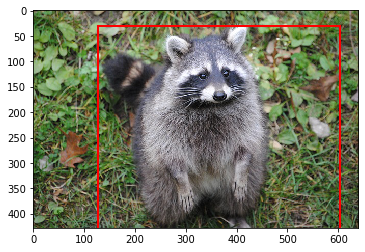

In [91]:
x0 = int(pred[0][0] * w / img_size) # Scale the BBox
y0 = int(pred[0][1] * h / img_size)

x1 = int((pred[0][2]) * w / img_size)
y1 = int((pred[0][3]) * h / img_size)


import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np


# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(img)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), (x1 - x0) , (y1 - y0) , linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()